iteration 1
changed: True
iteration 2
changed: True
iteration 3
changed: True
iteration 4
changed: True
iteration 5
changed: True
iteration 6
changed: True
iteration 7
changed: True
iteration 8
changed: True
iteration 9
changed: True


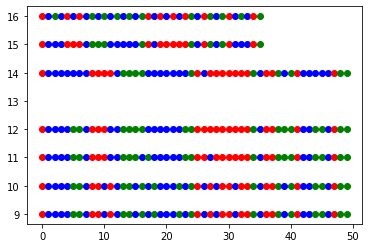

In [0]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def prepare_plot(data, y=10):
  my_colors = {1:'red',2:'green',3:'blue', 4:'orange', 5:'gray'}

  for i,j in enumerate(data):
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(i, y, color = my_colors.get(j, 'black'))

def prepare_plot_rle(data, y=10):
  my_colors = {1:'red',2:'green',3:'blue', 4:'orange', 5:'gray'}

  for i,j in enumerate(data):
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(i, y, color = my_colors.get(j[0], 'black'))


def fill_gaps(data):
  new = []
  last = None
  for index, slot in enumerate(data):
    if last is None:
      last = slot
      new.append(slot)
    elif last is not slot:
      if index+1 < len(data) and data[index-1] == data[index + 1]:
        new.append(data[index-1])
      else:
        last = slot
        new.append(slot)
    else:
      new.append(slot)
  return new

def fill_gaps_rle(data, window=3):
  new = []
  last = None
  changed = False
  for index, slot in enumerate(data):
    if last is None:
      last = slot[0]
      new.append(slot)
    elif last is not slot[0]:
      if index+1 < len(data) \
        and data[index-1][0] == data[index + 1][0] \
        and slot[1] <= window \
        and (data[index-1][1] >= window or index <= window):
        new.append((last, slot[1]))
        changed = True
      else:
        last = slot[0]
        new.append(slot)
    else:
      new.append(slot)

  return new,changed

def fill_gaps_rle_inplace(data, window=3):
  new = data.copy()
  last = None
  changed = False
  for index, slot in enumerate(new):
    if last is None:
      last = new[index][0]
    elif last is not new[index][0]:
      if index+1 < len(new) \
        and new[index-1][0] == new[index + 1][0] \
        and new[index][1] <= window \
        and (new[index-1][1] >= window or new[index+1][1] >= window or index <= window):
        new[index] = (last, new[index][1])
        changed = True
      else:
        last = new[index][0]

  return new,changed

def single_to_rle(data):

  last = None
  last_count = 0
  rle = []

  for index,value in enumerate(data):
    if last is None:
      last = value
      last_count = 1

    elif last == value and index + 1 < len(data): 
      last_count = last_count + 1

    elif last == value and index + 1 == len(data): 
      last_count = last_count + 1
      rle.append((last,last_count))

    elif last != value and index + 1 < len(data):
      rle.append((last,last_count))
      last = value
      last_count = 1
    else: #last != value and index + 1 == len(data)
      rle.append((last,last_count))      
      rle.append((value,1))
    
  return rle

def rle_to_single(data):

  new = []

  for index, value in enumerate(data):
    for i in range(value[1]):
      new.append(value[0])

  return new

slots = np.random.randint(1,6,50) # 5 categories
slots = np.random.randint(1,4,50) # 3 categories

fill1 = fill_gaps(slots)
fill2 = fill_gaps(fill1)

prepare_plot(slots, y=10)
prepare_plot(fill1, y=11)
prepare_plot(fill2, y=12)

rle_slots = single_to_rle(slots)

changed = True
iteration = 1
while changed and iteration < 10:
  print("iteration {0}".format(iteration))
  fill1_rle, changed = fill_gaps_rle_inplace(rle_slots, window=2)
  print("changed: {0}".format(changed))
  iteration = iteration + 1
fill3 = rle_to_single(fill1_rle)

single_slots = rle_to_single(rle_slots)

prepare_plot(single_slots, y=9)
prepare_plot_rle(fill1_rle, y=15)
prepare_plot_rle(rle_slots, y=16)

prepare_plot(fill3, y=14)

plt.show()


